In [12]:
import pandas as pd
from pathlib import Path
from IPython.display import display

In [9]:
def nan_ratios(df, only_show_metrics_with_nans: bool=True):
    nan_ratios = []
    for metric in df.metric.unique():
        metric_df = df.loc[df.metric == metric, "metric_value"]
        nan_ratios.append({"metric": metric, "nan_ratio": metric_df.isna().sum() / len(metric_df)})
    new_df = pd.DataFrame.from_records(nan_ratios).sort_values(by=["nan_ratio"])
    if only_show_metrics_with_nans:
        new_df = new_df[new_df.nan_ratio > 0]
    return new_df

In [34]:
def get_parquet_paths(basedir: str = "../../experiments/results"):
    raw_results = list(
        filter(lambda path: not path.name.endswith("debug.parquet"), Path(basedir).glob("correlation*.parquet"))
    )
    return raw_results

def get_csv_paths(basedir: str = "../../experiments/results"):
    raw_results = list(
        filter(lambda path: not "debug" in str(path), Path(basedir).glob("correlation*.csv"))
    )
    return raw_results

def get_dataframes(paths: list[Path]):
    dfs = []
    for p in paths:
        if p.name.endswith("parquet"):
            dfs.append(pd.read_parquet(p))
        elif p.name.endswith("csv"):
            dfs.append(pd.read_csv(p, index_col=0))
        else:
            raise NotImplementedError()
    return dfs

In [28]:
for df in get_dataframes(get_parquet_paths()):
    print(df.loc[:, "source__representation_dataset"].iloc[0])
    display(nan_ratios(df))

sst2_sc_rate0558


,metric,nan_ratio
0,PWCCA,0.156667
21,JSD,0.350000


sst2_mem_rate0


,metric,nan_ratio
21,JSD,0.35
0,PWCCA,0.60


sst2_aug_rate0


,metric,nan_ratio
21,JSD,0.326667
0,PWCCA,0.696667


In [88]:
dfs = get_dataframes(get_csv_paths())
rank_df = None
corr_df = None
for df in dfs:
    print(df.representation_dataset.iloc[0])

    data = df.copy()
    data.loc[:, "abs_corr"] = data["corr"].abs()
    pivot = data.pivot(
        columns=["functional_similarity_measure", "quality_measure"],
        index="similarity_measure",
        values="abs_corr",
    )

    # display(
    #     df.pivot(
    #         columns=["functional_similarity_measure", "quality_measure"], index="similarity_measure", values="corr"
    #     )
    # )
    display(pivot.sort_values(("Disagreement", "spearmanr"), ascending=False))

    ranked_pivot = pivot.rank(ascending=False)
    # display(ranked_pivot)
    if rank_df is None:
        rank_df = ranked_pivot
    else:
        rank_df += ranked_pivot
    if corr_df is None:
        corr_df = pivot
    else:
        corr_df += pivot

print("Average rank")
rank_df = rank_df / len(dfs)
corr_df = corr_df / len(dfs)
display(rank_df)

sst2_sc_rate0558


functional_similarity_measure                   JSD                       \
quality_measure                            pearsonr spearmanr kendalltau   
similarity_measure                                                         
RSA                                        0.970775  0.879665   0.695268   
AlignedCosineSimilarity                    0.935008  0.825194   0.606661   
DistanceCorrelation                        0.909496  0.840227   0.620724   
CKA                                        0.945642  0.832577   0.606450   
SVCCA                                      0.899517  0.834975   0.611314   
OrthogonalProcrustesCenteredAndNormalized  0.950997  0.821031   0.592070   
OrthogonalAngularShapeMetricCentered       0.949919  0.821031   0.592070   
JaccardSimilarity                          0.832982  0.753741   0.510653   
PermutationProcrustes                      0.892890  0.847437   0.642189   
RankSimilarity                             0.809892  0.728681   0.482527   
HardCorrelationMatch                       0.952826  0.834603   0.616072   
SoftCorrelationMatch                       0.954306  0.831912   0.613746   
ProcrustesSizeAndShapeDistance             0.897140  0.725440   0.472059   
SecondOrderCosineSimilarity                0.781115  0.683298   0.420248   
MagnitudeDifference                        0.874556  0.836016   0.633307   
Gulp                                       0.544439  0.724396   0.482950   
ConcentricityDifference                    0.831864  0.778664   0.565741   
EigenspaceOverlapScore                     0.666729  0.637131   0.459265   
PWCCA                                      0.218424  0.250256   0.172166   
UniformityDifference                       0.231596  0.167499   0.118160   
RSMNormDifference                               NaN       NaN        NaN   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
RSA                                           0.965258  0.846505   0.660699  
AlignedCosineSimilarity                       0.949768  0.814874   0.609414  
DistanceCorrelation                           0.906908  0.814843   0.613224  
CKA                                           0.925544  0.802024   0.597220  
SVCCA                                         0.880741  0.798744   0.597982  
OrthogonalProcrustesCenteredAndNormalized     0.939569  0.795506   0.585430  
OrthogonalAngularShapeMetricCentered          0.939704  0.795506   0.585430  
JaccardSimilarity                             0.792557  0.794699   0.572788  
PermutationProcrustes                         0.882359  0.789568   0.597758  
RankSimilarity                                0.789828  0.771009   0.546921  
HardCorrelationMatch                          0.923964  0.765621   0.567991  
SoftCorrelationMatch                          0.921422  0.747521   0.555797  
ProcrustesSizeAndShapeDistance                0.913194  0.739443   0.514061  
SecondOrderCosineSimilarity                   0.784800  0.732671   0.492946  
MagnitudeDifference                           0.890374  0.700504   0.511102  
Gulp                                          0.541365  0.698295   0.469769  
ConcentricityDifference                       0.847378  0.637429   0.451838  
EigenspaceOverlapScore                        0.646869  0.545342   0.384324  
PWCCA                                         0.222256  0.293757   0.215252  
UniformityDifference                          0.128954  0.085215   0.061282  
RSMNormDifference                                  NaN       NaN        NaN

sst2_aug_rate0


functional_similarity_measure                   JSD                       \
quality_measure                            pearsonr spearmanr kendalltau   
similarity_measure                                                         
RSA                                        0.532564  0.525512   0.371460   
DistanceCorrelation                        0.624714  0.604271   0.431358   
CKA                                        0.636829  0.629267   0.457071   
SVCCA                                      0.628104  0.629423   0.458352   
OrthogonalAngularShapeMetricCentered       0.633081  0.643104   0.458844   
OrthogonalProcrustesCenteredAndNormalized  0.632743  0.643037   0.458746   
ProcrustesSizeAndShapeDistance             0.644838  0.600698   0.427220   
SoftCorrelationMatch                       0.234638  0.203454   0.136299   
HardCorrelationMatch                       0.258329  0.220612   0.145362   
JaccardSimilarity                          0.326567  0.311421   0.209202   
EigenspaceOverlapScore                     0.089925  0.131459   0.084380   
PermutationProcrustes                      0.186690  0.201419   0.137481   
AlignedCosineSimilarity                    0.678785  0.621718   0.443673   
RankSimilarity                             0.353368  0.324313   0.217083   
Gulp                                       0.068624  0.044489   0.033939   
PWCCA                                      0.118508  0.109067   0.073370   
SecondOrderCosineSimilarity                0.369586  0.299452   0.208807   
MagnitudeDifference                        0.458563  0.331593   0.229102   
UniformityDifference                       0.173467  0.226123   0.151963   
ConcentricityDifference                    0.537689  0.467784   0.329294   
RSMNormDifference                               NaN       NaN        NaN   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
RSA                                           0.551998  0.514367   0.371874  
DistanceCorrelation                           0.548007  0.508972   0.364830  
CKA                                           0.526756  0.488552   0.350020  
SVCCA                                         0.521197  0.479824   0.343609  
OrthogonalAngularShapeMetricCentered          0.430107  0.450826   0.315253  
OrthogonalProcrustesCenteredAndNormalized     0.430376  0.450803   0.315208  
ProcrustesSizeAndShapeDistance                0.276601  0.280325   0.195329  
SoftCorrelationMatch                          0.297992  0.259611   0.174920  
HardCorrelationMatch                          0.294943  0.243934   0.163090  
JaccardSimilarity                             0.270616  0.241432   0.166657  
EigenspaceOverlapScore                        0.268649  0.236802   0.163000  
PermutationProcrustes                         0.255308  0.228730   0.152479  
AlignedCosineSimilarity                       0.185472  0.224575   0.152931  
RankSimilarity                                0.264897  0.213535   0.147061  
Gulp                                          0.095124  0.188665   0.125252  
PWCCA                                         0.138015  0.167784   0.110277  
SecondOrderCosineSimilarity                   0.204151  0.147454   0.103173  
MagnitudeDifference                           0.357359  0.146968   0.102089  
UniformityDifference                          0.115065  0.039147   0.029530  
ConcentricityDifference                       0.011285  0.017273   0.012011  
RSMNormDifference                                  NaN       NaN        NaN

sst2_mem_rate0


functional_similarity_measure                   JSD                       \
quality_measure                            pearsonr spearmanr kendalltau   
similarity_measure                                                         
RSA                                        0.550568  0.545864   0.387470   
DistanceCorrelation                        0.583901  0.590411   0.412107   
CKA                                        0.576246  0.577902   0.411472   
SVCCA                                      0.589181  0.582354   0.411261   
OrthogonalProcrustesCenteredAndNormalized  0.567925  0.554052   0.387259   
OrthogonalAngularShapeMetricCentered       0.568061  0.554052   0.387259   
JaccardSimilarity                          0.517939  0.517772   0.347900   
SoftCorrelationMatch                       0.599634  0.576130   0.391065   
EigenspaceOverlapScore                     0.438768  0.449783   0.317540   
HardCorrelationMatch                       0.583661  0.553087   0.376791   
RankSimilarity                             0.504342  0.463485   0.323500   
UniformityDifference                       0.716813  0.667213   0.456516   
SecondOrderCosineSimilarity                0.473989  0.426320   0.298123   
AlignedCosineSimilarity                    0.895869  0.871356   0.699709   
ProcrustesSizeAndShapeDistance             0.835692  0.779313   0.591858   
ConcentricityDifference                    0.914328  0.893280   0.717709   
PWCCA                                      0.097280  0.196098   0.133651   
PermutationProcrustes                      0.296550  0.281775   0.200740   
MagnitudeDifference                        0.092386  0.109575   0.072694   
Gulp                                       0.058890  0.006265   0.012847   
RSMNormDifference                               NaN       NaN        NaN   

functional_similarity_measure             Disagreement                       
quality_measure                               pearsonr spearmanr kendalltau  
similarity_measure                                                           
RSA                                           0.928065  0.888552   0.745907  
DistanceCorrelation                           0.925135  0.887167   0.731536  
CKA                                           0.936580  0.886630   0.733596  
SVCCA                                         0.935021  0.886099   0.729804  
OrthogonalProcrustesCenteredAndNormalized     0.931480  0.847812   0.679342  
OrthogonalAngularShapeMetricCentered          0.929469  0.847812   0.679342  
JaccardSimilarity                             0.881799  0.786424   0.605625  
SoftCorrelationMatch                          0.935157  0.780473   0.586001  
EigenspaceOverlapScore                        0.809269  0.774790   0.591727  
HardCorrelationMatch                          0.932214  0.767069   0.572894  
RankSimilarity                                0.877223  0.758619   0.582490  
UniformityDifference                          0.909856  0.742191   0.545650  
SecondOrderCosineSimilarity                   0.810833  0.727769   0.548506  
AlignedCosineSimilarity                       0.669216  0.577340   0.407512  
ProcrustesSizeAndShapeDistance                0.554988  0.505073   0.346658  
ConcentricityDifference                       0.451435  0.431231   0.305683  
PWCCA                                         0.431383  0.391949   0.288423  
PermutationProcrustes                         0.305502  0.367608   0.268811  
MagnitudeDifference                           0.181285  0.200047   0.128660  
Gulp                                          0.284117  0.054378   0.009292  
RSMNormDifference                                  NaN       NaN        NaN

Average rank


functional_similarity_measure                    JSD                        \
quality_measure                             pearsonr  spearmanr kendalltau   
similarity_measure                                                           
AlignedCosineSimilarity                     3.333333   5.333333   5.000000   
CKA                                         6.000000   6.000000   6.333333   
ConcentricityDifference                     7.666667   7.333333   7.333333   
DistanceCorrelation                         7.333333   4.666667   5.000000   
EigenspaceOverlapScore                     17.333333  17.000000  16.666667   
Gulp                                       19.333333  18.666667  18.000000   
HardCorrelationMatch                        8.333333  10.666667  10.666667   
JaccardSimilarity                          13.000000  12.666667  12.666667   
MagnitudeDifference                        13.666667  11.000000  10.666667   
OrthogonalAngularShapeMetricCentered        6.333333   7.000000   7.333333   
OrthogonalProcrustesCenteredAndNormalized   6.666667   7.333333   7.666667   
PWCCA                                      18.666667  18.666667  18.666667   
PermutationProcrustes                      14.666667  12.000000  11.666667   
ProcrustesSizeAndShapeDistance              5.000000   8.333333   8.666667   
RSA                                         7.333333   7.000000   6.000000   
RSMNormDifference                                NaN        NaN        NaN   
RankSimilarity                             13.666667  13.000000  13.333333   
SVCCA                                       7.000000   4.666667   5.666667   
SecondOrderCosineSimilarity                14.000000  15.333333  15.666667   
SoftCorrelationMatch                        7.333333  10.666667  10.333333   
UniformityDifference                       13.333333  12.666667  12.666667   

functional_similarity_measure             Disagreement                        
quality_measure                               pearsonr  spearmanr kendalltau  
similarity_measure                                                            
AlignedCosineSimilarity                      10.666667   9.666667   9.666667  
CKA                                           3.000000   3.333333   3.666667  
ConcentricityDifference                      16.333333  17.666667  17.666667  
DistanceCorrelation                           6.333333   2.333333   2.333333  
EigenspaceOverlapScore                       14.000000  12.666667  12.333333  
Gulp                                         18.666667  17.000000  17.000000  
HardCorrelationMatch                          6.333333  10.000000  10.333333  
JaccardSimilarity                            11.666667   8.333333   8.333333  
MagnitudeDifference                          12.333333  17.333333  17.000000  
OrthogonalAngularShapeMetricCentered          5.000000   5.666667   6.000000  
OrthogonalProcrustesCenteredAndNormalized     4.666667   6.000000   6.333333  
PWCCA                                        17.666667  17.333333  17.333333  
PermutationProcrustes                        14.333333  13.000000  12.000000  
ProcrustesSizeAndShapeDistance               11.000000  11.666667  11.666667  
RSA                                           3.000000   1.000000   1.000000  
RSMNormDifference                                  NaN        NaN        NaN  
RankSimilarity                               13.000000  11.666667  12.000000  
SVCCA                                         6.333333   4.333333   4.000000  
SecondOrderCosineSimilarity                  14.333333  14.666667  14.666667  
SoftCorrelationMatch                          5.666667   9.333333   9.333333  
UniformityDifference                         15.666667  17.000000  17.333333

In [72]:
rank_df.loc[:, ("JSD", "spearmanr")].sort_values(ascending=False)

similarity_measure
PWCCA                                        18.666667
Gulp                                         18.666667
EigenspaceOverlapScore                       17.000000
SecondOrderCosineSimilarity                  15.333333
RankSimilarity                               13.000000
UniformityDifference                         12.666667
JaccardSimilarity                            12.666667
PermutationProcrustes                        12.000000
MagnitudeDifference                          11.000000
SoftCorrelationMatch                         10.666667
HardCorrelationMatch                         10.666667
ProcrustesSizeAndShapeDistance                8.333333
OrthogonalProcrustesCenteredAndNormalized     7.333333
ConcentricityDifference                       7.333333
RSA                                           7.000000
OrthogonalAngularShapeMetricCentered          7.000000
CKA                                           6.000000
AlignedCosineSimilarity                       

In [74]:
rank_df.loc[:, ("Disagreement", "spearmanr")].sort_values(ascending=False)

similarity_measure
ConcentricityDifference                      17.666667
PWCCA                                        17.333333
MagnitudeDifference                          17.333333
Gulp                                         17.000000
UniformityDifference                         17.000000
SecondOrderCosineSimilarity                  14.666667
PermutationProcrustes                        13.000000
EigenspaceOverlapScore                       12.666667
RankSimilarity                               11.666667
ProcrustesSizeAndShapeDistance               11.666667
HardCorrelationMatch                         10.000000
AlignedCosineSimilarity                       9.666667
SoftCorrelationMatch                          9.333333
JaccardSimilarity                             8.333333
OrthogonalProcrustesCenteredAndNormalized     6.000000
OrthogonalAngularShapeMetricCentered          5.666667
SVCCA                                         4.333333
CKA                                           

In [76]:
rank_df.loc[:, ("Disagreement", "kendalltau")].sort_values(ascending=False)


similarity_measure
ConcentricityDifference                      17.666667
PWCCA                                        17.333333
UniformityDifference                         17.333333
MagnitudeDifference                          17.000000
Gulp                                         17.000000
SecondOrderCosineSimilarity                  14.666667
EigenspaceOverlapScore                       12.333333
RankSimilarity                               12.000000
PermutationProcrustes                        12.000000
ProcrustesSizeAndShapeDistance               11.666667
HardCorrelationMatch                         10.333333
AlignedCosineSimilarity                       9.666667
SoftCorrelationMatch                          9.333333
JaccardSimilarity                             8.333333
OrthogonalProcrustesCenteredAndNormalized     6.333333
OrthogonalAngularShapeMetricCentered          6.000000
SVCCA                                         4.000000
CKA                                           

In [77]:
from scipy.stats import kendalltau

In [85]:
kendalltau(
    rank_df.loc[:, ("Disagreement", "kendalltau")].values,
    rank_df.loc[:, ("Disagreement", "spearmanr")].values,
    nan_policy="omit",
)

SignificanceResult(statistic=0.9625668449197861, pvalue=4.674772948511561e-09)

In [90]:
corr_df.loc[:, ("Disagreement", "spearmanr")].sort_values(ascending=False)


similarity_measure
RSA                                          0.749808
DistanceCorrelation                          0.736994
CKA                                          0.725735
SVCCA                                        0.721556
OrthogonalAngularShapeMetricCentered         0.698048
OrthogonalProcrustesCenteredAndNormalized    0.698040
JaccardSimilarity                            0.607518
SoftCorrelationMatch                         0.595868
HardCorrelationMatch                         0.592208
RankSimilarity                               0.581054
AlignedCosineSimilarity                      0.538930
SecondOrderCosineSimilarity                  0.535965
EigenspaceOverlapScore                       0.518978
ProcrustesSizeAndShapeDistance               0.508280
PermutationProcrustes                        0.461969
ConcentricityDifference                      0.361977
MagnitudeDifference                          0.349173
Gulp                                         0.313779
Uniformit

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

                           similarity_measure       JSD
                                              spearmanr
0                     AlignedCosineSimilarity  0.772756
1                                         CKA  0.679915
2                     ConcentricityDifference  0.713243
3                         DistanceCorrelation  0.678303
4                      EigenspaceOverlapScore  0.406124
5                                        Gulp  0.258383
6                        HardCorrelationMatch  0.536101
7                           JaccardSimilarity  0.527644
8                         MagnitudeDifference  0.425728
9        OrthogonalAngularShapeMetricCentered  0.672729
10  OrthogonalProcrustesCenteredAndNormalized  0.672707
11                                      PWCCA  0.185141
12                      PermutationProcrustes  0.443544
13             ProcrustesSizeAndShapeDistance  0.701817
14                                        RSA  0.650347
15                          RSMNormDifference   

/tmp/ipykernel_25019/4051429699.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
/tmp/ipykernel_25019/4051429699.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


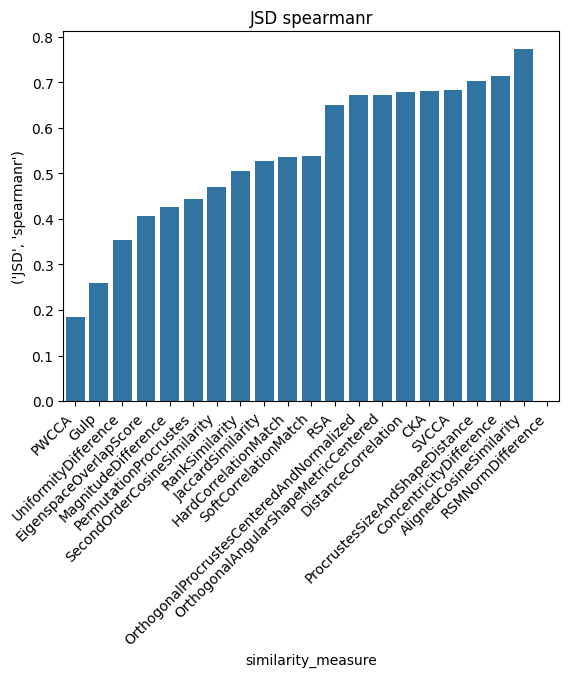

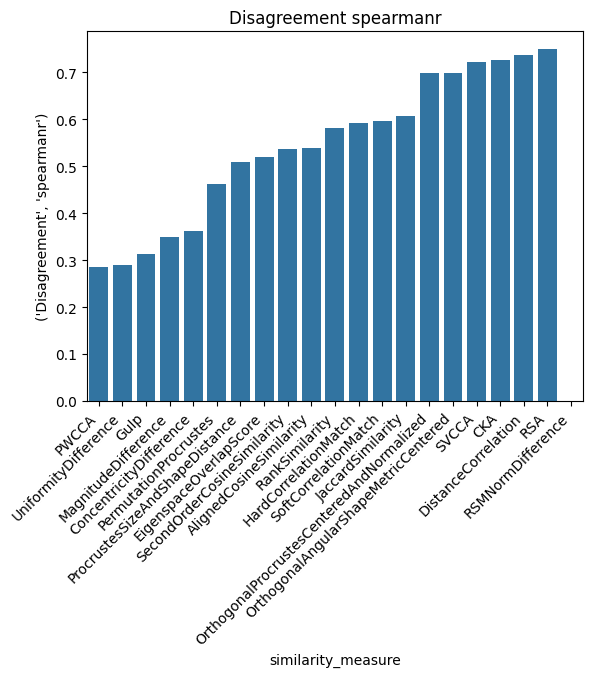

In [119]:
qmeasure = "spearmanr"
for funcsim_measure in ["JSD", "Disagreement"]:
    plot_df = corr_df.loc[:, (funcsim_measure,qmeasure)].reset_index()#.unstack(1).reset_index()
    print(plot_df)
    plt.figure()
    g = sns.barplot(data=plot_df.sort_values(by=(funcsim_measure, qmeasure)), x="similarity_measure", y=(funcsim_measure, qmeasure))
    g.set_title(f"{funcsim_measure} {qmeasure}")

    ax = g.axes
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")